In [2]:
%%bq query --name total_births
#SQL query to return total births by year
SELECT CAST(source_year AS string) AS year, COUNT(is_male) AS birth_count
FROM `publicdata.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

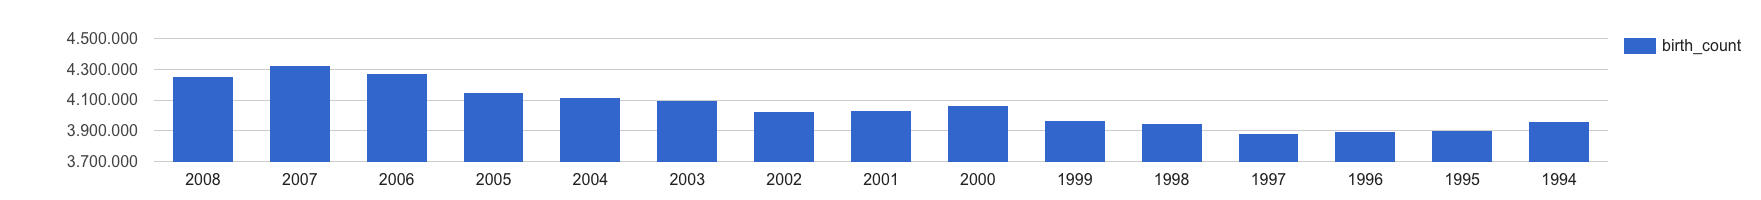

In [3]:
%chart columns --data total_births --fields year,birth_count

In [4]:
%%bq query --name births_by_weekday
SELECT CAST(wday AS string) AS weekday, SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births, SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births
FROM `publicdata.samples.natality`
WHERE wday IS NOT NULL
GROUP BY weekday
ORDER BY weekday ASC

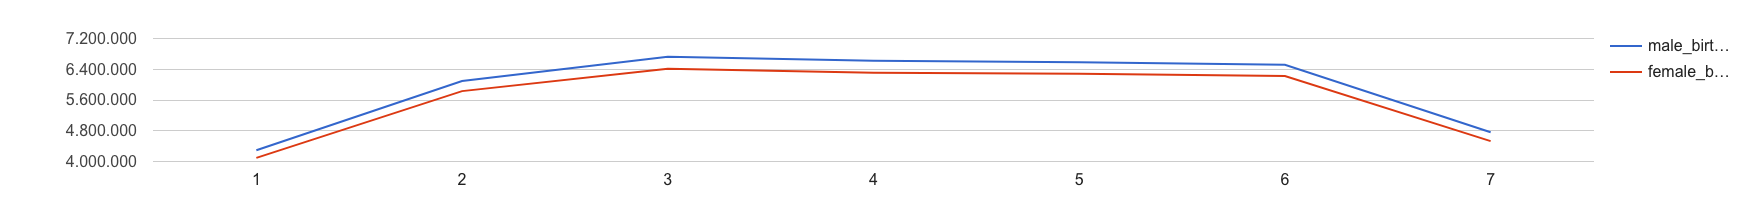

In [5]:
%chart line --data births_by_weekday --fields weekday,male_births,female_births